In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import models,layers

In [2]:
datasets = tf.keras.preprocessing.image_dataset_from_directory(
    directory = "data_images",
    shuffle = True,
    batch_size = 32,
    image_size = (256,256)
    )

class_names = datasets.class_names
class_names

Found 16011 files belonging to 10 classes.


['Tomato_Bacterial_spot',
 'Tomato_Early_blight',
 'Tomato_Late_blight',
 'Tomato_Leaf_Mold',
 'Tomato_Septoria_leaf_spot',
 'Tomato_Spider_mites_Two_spotted_spider_mite',
 'Tomato__Target_Spot',
 'Tomato__Tomato_YellowLeaf__Curl_Virus',
 'Tomato__Tomato_mosaic_virus',
 'Tomato_healthy']

In [8]:
len(datasets)

501

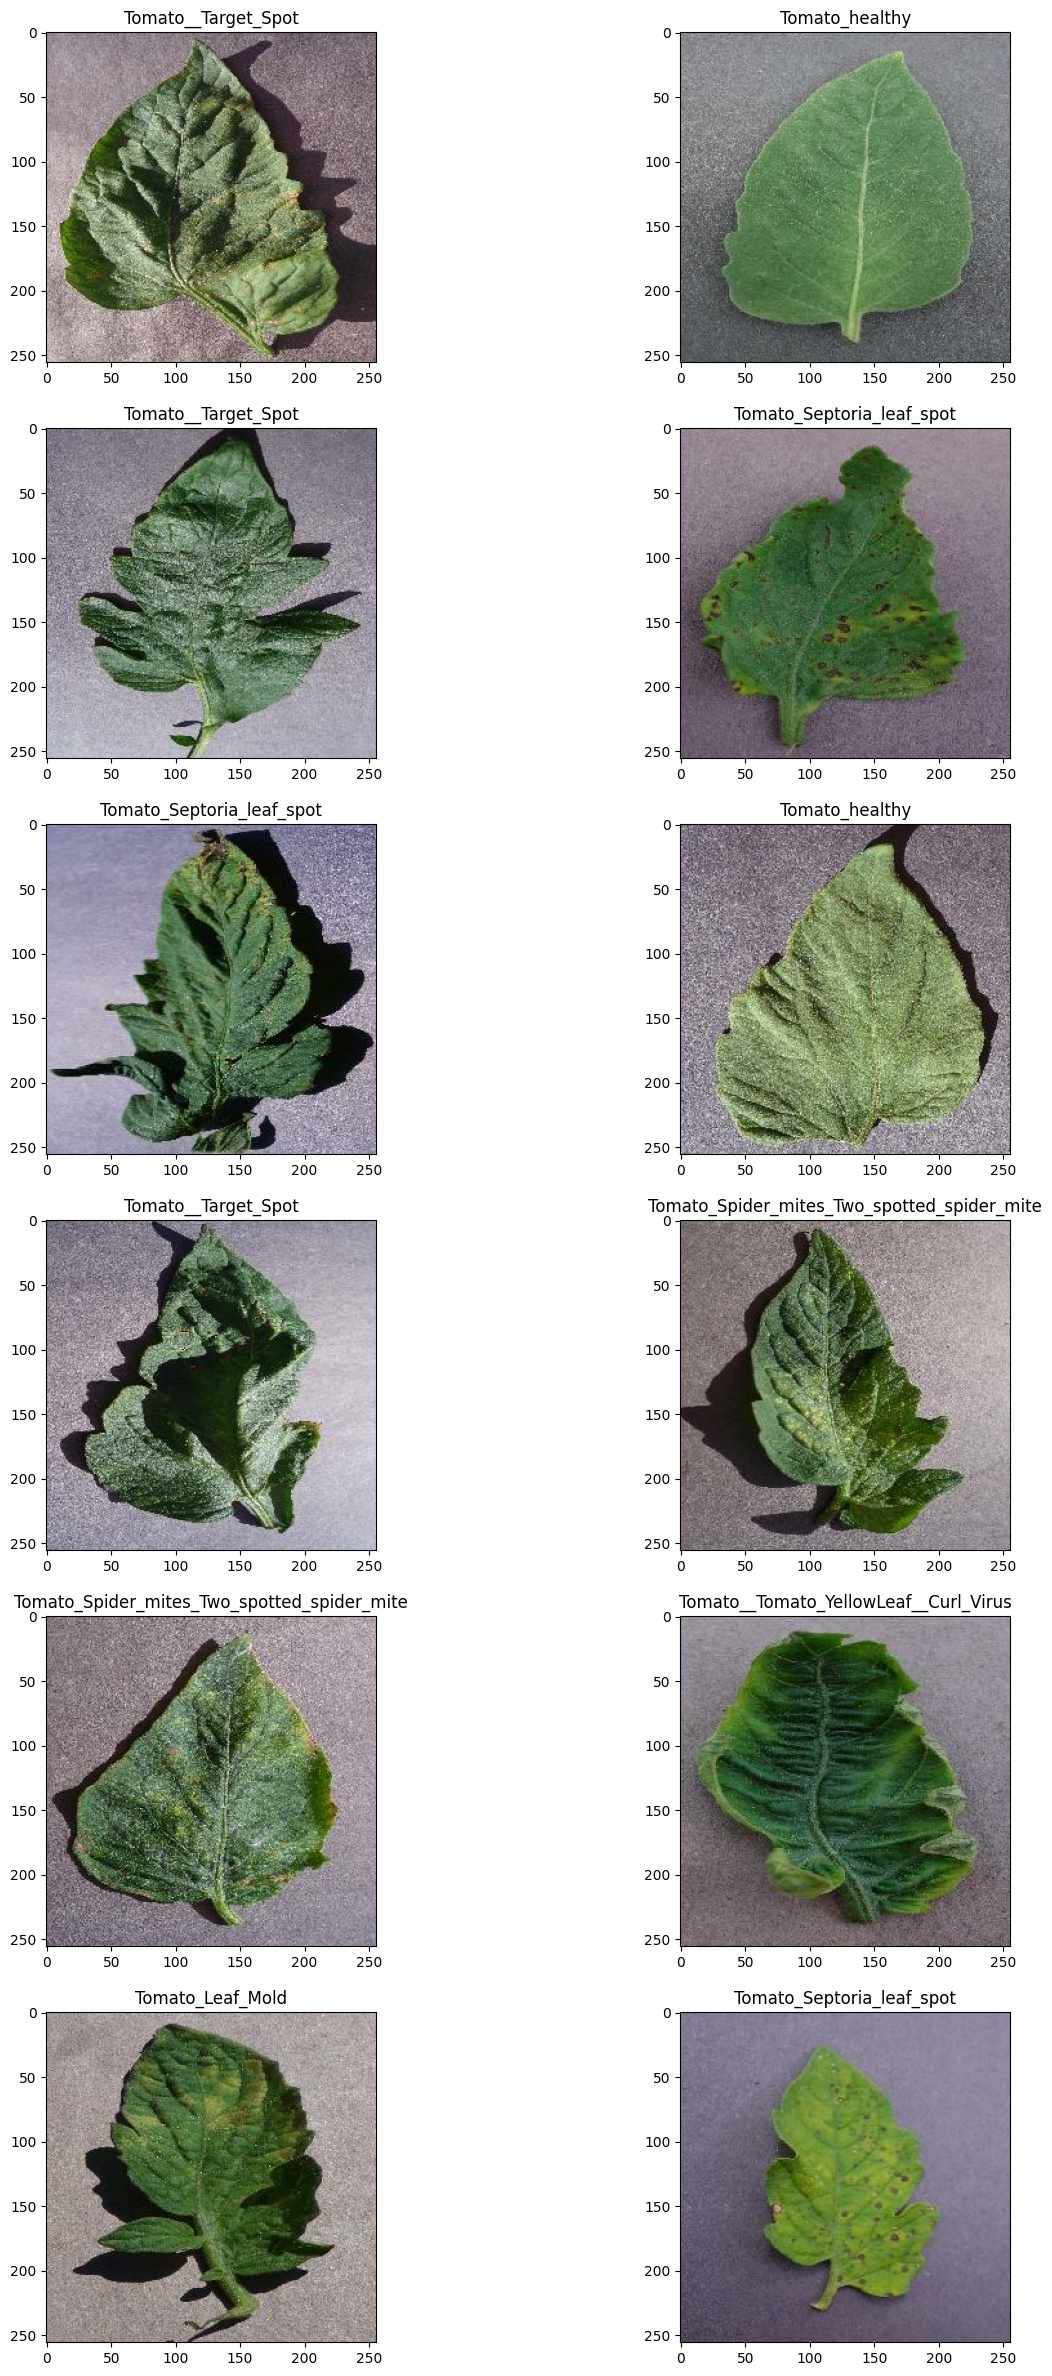

In [3]:
plt.figure(figsize=(15,30))
for i,j in datasets.take(1):
    for k in range(12):

        ax = plt.subplot(6,2,k+1)
        plt.imshow(i[k].numpy().astype("uint8"))
        plt.title(class_names[j[k]])

    


In [31]:
len(datasets)

501

In [35]:
# Training

print(80/100 *len(datasets))

print(10/100 *len(datasets))

400.8
50.1


In [4]:
def give_ds(ds,train_size=0.8,test_size = 0.1, val_size = 0.1):
    lenght_ds = len(ds)
    train_s = int(train_size*lenght_ds)
    test_s = int(test_size*lenght_ds)
    val_s = int(val_size* lenght_ds)

    train_ds = ds.take(train_s)
    test_ds = ds.skip(train_s).skip(val_s)
    validation_ds = ds.skip(train_s).take(val_s)
    return train_ds,test_ds,validation_ds
    


    
    
    

In [5]:
train_dataset,test_dataset,val_dataset = give_ds(datasets)

In [6]:
resize_and_rescale = tf.keras.Sequential(
    [
        layers.Resizing(255,255),
        layers.Rescaling(1/255)
    ]
)
augmentation = tf.keras.Sequential(
    [
        layers.RandomFlip("horizontal_and_vertical"),
        layers.RandomRotation(0.2)
    ]
)

In [7]:

input_size = (32,256,256,3)
model = models.Sequential([
    resize_and_rescale,
    augmentation,
    layers.Conv2D(32,(3,3),activation="relu",input_shape = input_size),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,kernel_size=(3,3),activation="relu"),
    layers.MaxPooling2D((3,3)),
    layers.Conv2D(64,(3,3),activation="relu"),
    layers.MaxPooling2D((3,3)),
    layers.Flatten(),
    layers.Dense(64,activation="relu"),
    layers.Dense(10,activation="softmax")
])

model.build(input_shape= input_size)

d:\desktop\NeoSoft\SL\Tomato_Disease_Predictor\tomatoenv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [8]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential (Sequential)         │ (32, 255, 255, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ sequential_1 (Sequential)       │ (32, 255, 255, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (32, 253, 253, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (32, 126, 126, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (32, 124, 124, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (32, 41, 41, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (32, 39, 39, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (32, 13, 13, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (32, 10816)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (32, 64)               │       692,288 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (32, 10)               │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 749,258 (2.86 MB)

 Trainable params: 749,258 (2.86 MB)

 Non-trainable params: 0 (0.00 B)

In [9]:
model.compile(
    optimizer = 'adam',
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics = ["accuracy"]
)

In [10]:
history = model.fit(
    train_dataset,
    epochs = 5,
    batch_size = 32,
    verbose =1,
    validation_data=val_dataset
)

Epoch 1/5


d:\desktop\NeoSoft\SL\Tomato_Disease_Predictor\tomatoenv\Lib\site-packages\keras\src\backend\tensorflow\nn.py:708: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


400/400 ━━━━━━━━━━━━━━━━━━━━ 305s 757ms/step - accuracy: 0.4182 - loss: 1.6571 - val_accuracy: 0.7113 - val_loss: 0.8265
Epoch 2/5
400/400 ━━━━━━━━━━━━━━━━━━━━ 371s 927ms/step - accuracy: 0.7466 - loss: 0.7056 - val_accuracy: 0.7631 - val_loss: 0.6650
Epoch 3/5
400/400 ━━━━━━━━━━━━━━━━━━━━ 329s 823ms/step - accuracy: 0.8176 - loss: 0.5189 - val_accuracy: 0.8637 - val_loss: 0.4076
Epoch 4/5
400/400 ━━━━━━━━━━━━━━━━━━━━ 287s 717ms/step - accuracy: 0.8671 - loss: 0.3940 - val_accuracy: 0.8700 - val_loss: 0.3981
Epoch 5/5
400/400 ━━━━━━━━━━━━━━━━━━━━ 291s 727ms/step - accuracy: 0.8872 - loss: 0.3340 - val_accuracy: 0.8338 - val_loss: 0.4935


In [12]:
scores = model.evaluate(test_dataset)
scores

51/51 ━━━━━━━━━━━━━━━━━━━━ 12s 152ms/step - accuracy: 0.8380 - loss: 0.4887


[0.49654120206832886, 0.8218497633934021]

In [95]:
history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

In [13]:
acc = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]

loss = history.history["loss"]
val_loss = history.history["val_loss"]

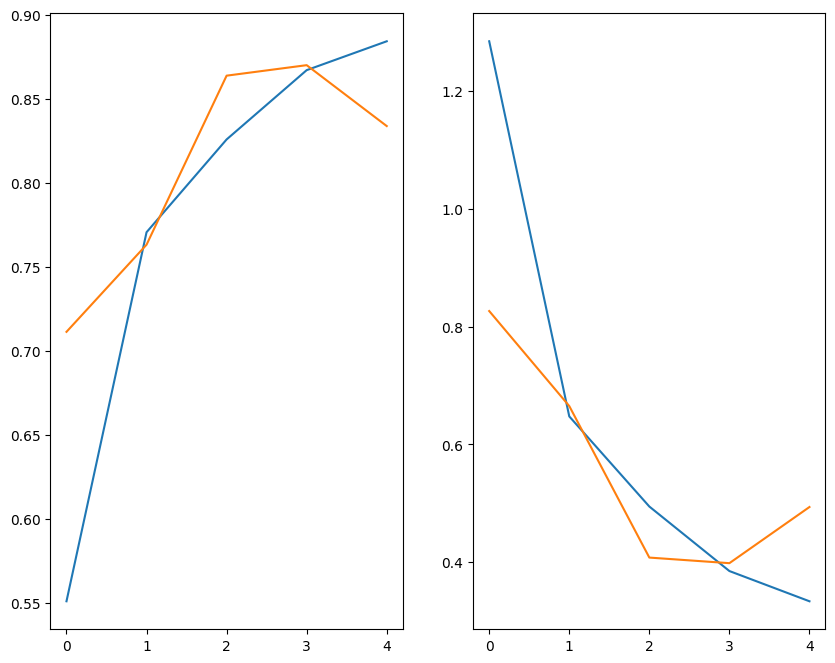

In [14]:
plt.figure(figsize=(10,8))
plt.subplot(1,2,1)
plt.plot(range(5),acc,label="TrainingAccuracy")
plt.plot(range(5),val_accuracy,label="Val_Accuracy")
plt.subplot(1,2,2)
plt.plot(range(5),loss,label="Loss")
plt.plot(range(5),val_loss,label="Val_Loss")


First Image to Predict
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 165ms/step
Actual_label Tomato_Bacterial_spot
Predicted_label Tomato_Bacterial_spot
Confidence 99.23


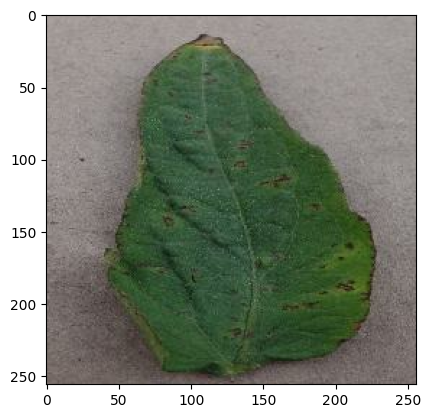

In [23]:
import numpy as np
for img,btc in datasets.take(1):
    first_image = img[0].numpy().astype("uint8")
    first_label = btc[0].numpy()

    print("First Image to Predict")
    plt.imshow(first_image)
    

    batch_prediction = model.predict(img)
    confidence_score = round(100*(np.max(batch_prediction[0])),2)
    predicted_img_ind = np.argmax(batch_prediction[0])
    print("Actual_label", class_names[first_label])
    print("Predicted_label", class_names[predicted_img_ind])
    print("Confidence", confidence_score)


In [39]:
model.save("model.h5")

In [43]:
from tensorflow.keras.models import load_model

model = load_model(r"D:\desktop\NeoSoft\SL\Tomato_Disease_Predictor\model.h5")
img_path = r"D:\desktop\NeoSoft\SL\Tomato_Disease_Predictor\data_images\Tomato__Tomato_mosaic_virus\0a7cc59f-b2b0-4201-9c4a-d91eca5c03a3___PSU_CG 2230.JPG"
img = tf.keras.utils.load_img(img_path,target_size=(32,256,3))
img_array = tf.keras.utils.img_to_array(img)/256
img_arr = np.expand_dims(img_array,axis=0)

prediction=model.predict(img_array)
predicted_class = np.argmax(predictions, axis=1)

print("Predicted class:", predicted_class[0])

ValueError: Exception encountered when calling Sequential.call().

[1mInvalid input shape for input Tensor("data:0", shape=(32, 256, 3), dtype=float32). Expected shape (32, 256, 256, 3), but input has incompatible shape (32, 256, 3)[0m

Arguments received by Sequential.call():
  • inputs=tf.Tensor(shape=(32, 256, 3), dtype=float32)
  • training=False
  • mask=None

In [38]:
model

<Sequential name=sequential_2, built=True>